# TRAITEMENT DES DONNEES (bien vendus : logement)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis #Asymetrie et aplatissement
from sklearn.preprocessing import OneHotEncoder #encodé
from sklearn.model_selection import train_test_split ## entraiement des données
import numpy as np
import scipy.stats as stats
##from sklearn.decomposition import PCA
##from sklearn.preprocessing import StandardScaler
##from sklearn.cluster import AgglomerativeClustering
##from scipy.cluster.hierarchy import dendrogram, linkage
##from sklearn.compose import ColumnTransformer


In [2]:
#Chargement du fichier

datadepartement = pd.read_csv("donnees_biens_associe_dept.csv",delimiter=';', index_col= [0])
datadepartement.head()

,INSEE_COM,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,1001,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,1002,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,1004,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,1005,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,1007,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [3]:
#Suppression des valeurs manquantes

datadepartement = datadepartement.dropna()

In [4]:
datadepartement.count()

INSEE_COM       30010
Nom_DEPT        30010
Nb_mutations    30010
NbMaisons       30010
NbApparts       30010
propmaison      30010
propappart      30010
PrixMoyen       30010
Prixm2Moyen     30010
SurfaceMoy      30010
dtype: int64

In [5]:
#Effaçon la colonne code des communes

datadepartement = datadepartement.drop(columns = ['INSEE_COM'])
datadepartement.head()

,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [6]:
# INFORMATION SUR LA DATA  
    
    # Le nombre de mutations
   # Le nombre de ventes de maisons et d'appartements
   # La proportion de ventes de maisons et d'appartements
   # Le prix moyen des biens vendus
   # Le prix moyen au m2 des biens vendus
   # La surface moyenne des biens vendus
   #Ces données sont dérivées d'un traitement de la base DVF géolocalisée, voici les mutations prises en comptes:
   # Mutation monoventes (pas de ventes en lots)
   #une mutation correspond à un transfert de propriété réalisé à titre onéreux sur des biens immobiliers.
   #Cela peut se produire lors d'une vente, d'une donation, d'un héritage, d'un échange,
   # Prix entre 15 000 € et 10 000 000 €
   # Surfaces des appartements (entre 10m² et 250m²) et surfaces des maisons (entre 10m² et 400m²)
   # Prix au m² entre 330 €/m² et 15 000 €/m²

In [7]:
#renommer les colonnes

datadepartement.columns =['Departement','Nb_mutations','Nb_vente_Maison','Nb_vente_Appart','prop_vente_maison','prop_vente_Appart','PrixMoyen','Prixm2Moyen','SurfaceMoy']
datadepartement.head()

,Departement,Nb_mutations,Nb_vente_Maison,Nb_vente_Appart,prop_vente_maison,prop_vente_Appart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [8]:
# Grouper par département et calculer le prix moyen par departement
prix_moyen_par_dept = datadepartement.groupby('Departement')['PrixMoyen'].mean().reset_index()
print(prix_moyen_par_dept)

        Departement      PrixMoyen
0                 -  169481.954236
1               Ain  251785.563692
2             Aisne  135294.434972
3            Allier  119804.157705
4   Alpes-Maritimes  292149.585666
..              ...            ...
89           Vend�e  194748.919320
90           Vienne  134816.086367
91           Vosges  133546.156863
92            Yonne  130683.504146
93         Yvelines  376237.634074

[94 rows x 2 columns]


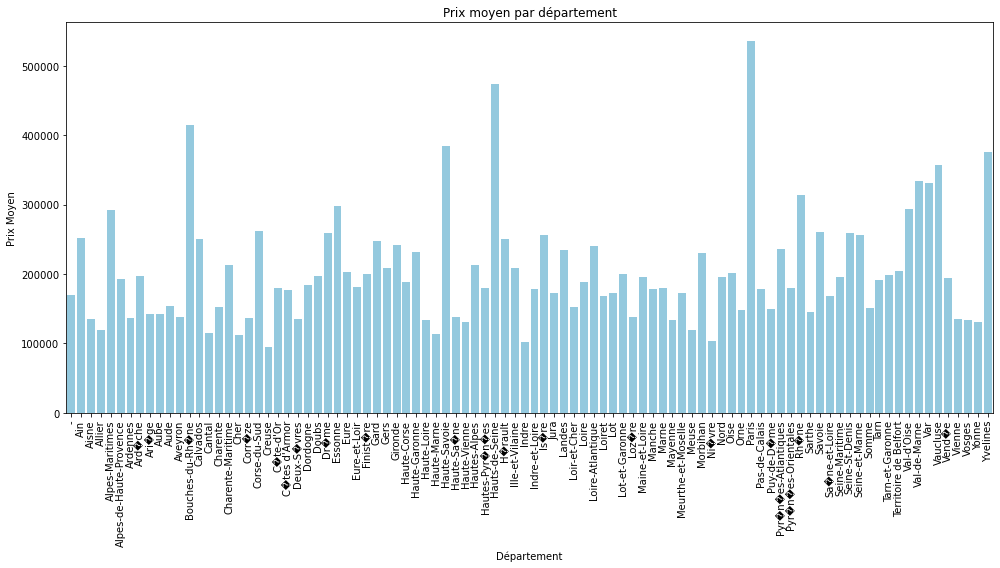

In [9]:
# Création de l'histogramme
plt.figure(figsize=(14, 8))
sns.barplot(x='Departement', y='PrixMoyen', data=prix_moyen_par_dept, color = 'skyblue')
plt.title('Prix moyen par département')
plt.xlabel('Département')
plt.ylabel('Prix Moyen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
datadepartement.describe()

,Nb_mutations,Nb_vente_Maison,Nb_vente_Appart,prop_vente_maison,prop_vente_Appart,PrixMoyen,Prixm2Moyen,SurfaceMoy
count,30010.000000,30010.000000,30010.000000,30010.000000,30010.000000,3.001000e+04,30010.000000,30010.000000
mean,25.520293,14.234022,11.286271,92.931494,7.068506,1.910578e+05,1975.922665,100.195354
std,209.136912,33.794406,194.214713,17.291248,17.291248,1.038155e+05,1017.955701,27.066416
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,400.000000,10.000000
25%,3.000000,3.000000,0.000000,100.000000,0.000000,1.234812e+05,1315.500000,84.666667
50%,6.000000,6.000000,0.000000,100.000000,0.000000,1.714625e+05,1761.833333,97.500000
75%,15.000000,13.000000,0.000000,100.000000,0.000000,2.343594e+05,2363.000000,112.000000
max,26511.000000,1213.000000,26415.000000,100.000000,100.000000,1.650890e+06,14000.000000,337.000000


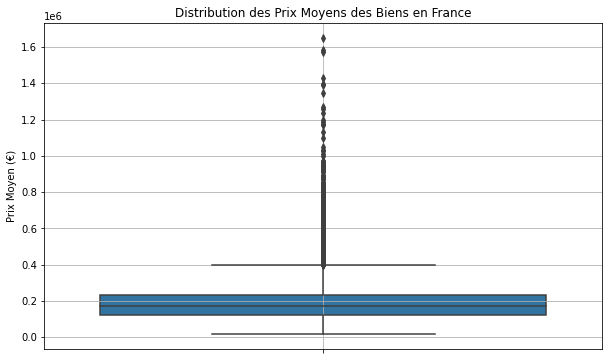

In [11]:
# Créer une boîte à moustaches pour la distribution des prix moyens
plt.figure(figsize=(10, 6))
sns.boxplot(y=datadepartement['PrixMoyen'])
plt.title('Distribution des Prix Moyens des Biens en France')
plt.ylabel('Prix Moyen (€)')
plt.grid(True)
plt.show()

In [52]:
# Filtrer les données pour le département de la Haute-Savoie (74)
haute_savoie_data = datadepartement[datadepartement['Departement'] == 'Haute-Savoie']

#### DISTRIBUTION DU PRIX MOYENS DES BIENS VENDU DANS LE DEPARTEMENT DES HAUTES SAVOIE

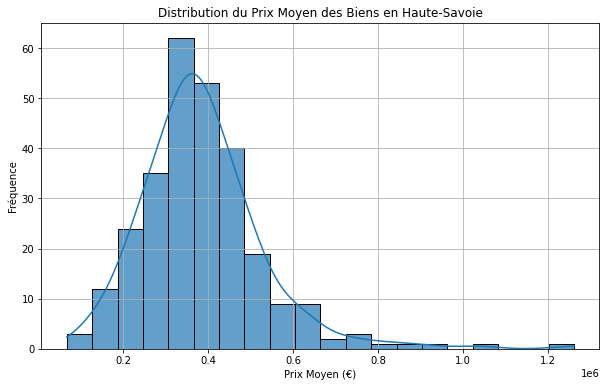

In [53]:
#DISTRIBUTION DU PRIX MOYEN SELON LE DEPARTEMENT HAUTE SAVOIE

plt.figure(figsize=(10, 6))
sns.histplot(haute_savoie_data['PrixMoyen'], bins=20, edgecolor='k', alpha=0.7, kde=True)
plt.title('Distribution du Prix Moyen des Biens en Haute-Savoie')
plt.xlabel('Prix Moyen (€)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

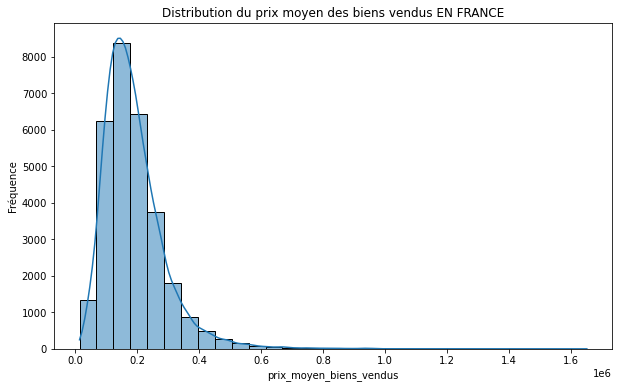

In [14]:
#DISTRIBUTION DU PRIX MOYEN EN FRANCE


plt.figure(figsize=(10, 6))
sns.histplot(datadepartement['PrixMoyen'], bins=30, kde=True)
plt.title('Distribution du prix moyen des biens vendus EN FRANCE')
plt.xlabel('prix_moyen_biens_vendus')
plt.ylabel('Fréquence')
plt.show()

In [15]:
#ASYMETRIE ET APPLATISSEMENT DE LA COURBE EN FRANCE

prix_moyen_par_dept = datadepartement.groupby('Departement')['PrixMoyen'].mean().reset_index()

prix_moyen = prix_moyen_par_dept['PrixMoyen']

skewness = skew(prix_moyen)
kurt = kurtosis(prix_moyen)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")



Skewness: 1.6443376536428829
Kurtosis: 3.467207753187874


##### Le Skweness = 1.64 > 0 on a une asymétrie positive vers la droite due aux valeurs extrêmes avec aucune incidence sur la moyenne.
##### Le Kurtosis = 3,46 > 3 On a une tres forte concentration des valeurs autours de la moyenne qui font qu'on a une asymétrie positive vers la droite.

In [16]:
#PRIX MOYEN MINIMUM ET MAXIMUM

min_prix = datadepartement['PrixMoyen'].min()
Dpt_min_prix = datadepartement[datadepartement['PrixMoyen'] == min_prix]
max_prix = datadepartement['PrixMoyen'].max()
Dpt_max_prix = datadepartement[datadepartement['PrixMoyen'] == max_prix]
print('departement avec prix moyen minimun', Dpt_min_prix)
print('departement avec prix moyen maximum', Dpt_max_prix)

departement avec prix moyen minimun           Departement  Nb_mutations  Nb_vente_Maison  Nb_vente_Appart  \
6864           Creuse             1              1.0              0.0   
7006           Creuse             1              1.0              0.0   
18753          Ni�vre             1              1.0              0.0   
20177            Orne             1              1.0              0.0   
23866  Sa�ne-et-Loire             1              1.0              0.0   
29176           Yonne             1              1.0              0.0   

       prop_vente_maison  prop_vente_Appart  PrixMoyen  Prixm2Moyen  \
6864               100.0                0.0    15000.0        429.0   
7006               100.0                0.0    15000.0        500.0   
18753              100.0                0.0    15000.0        833.0   
20177              100.0                0.0    15000.0        600.0   
23866              100.0                0.0    15000.0        417.0   
29176              100.0  

### ETUDE DE LA RELATION ENTRE LE PRIX MOYEN ET LA SURFACE MOYENNE

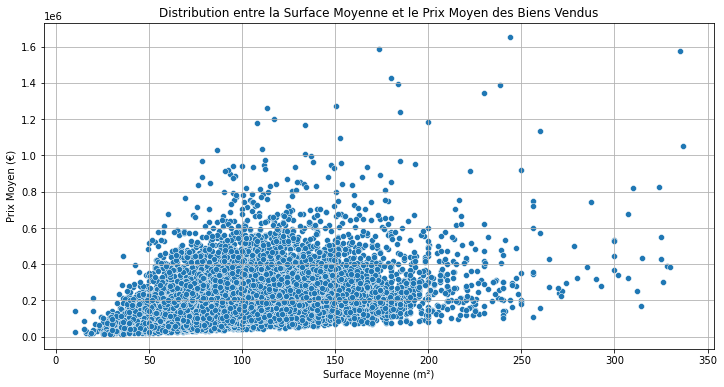

In [17]:
#Hypothèses
#H0 : l'on estime qu'il y'a une relation entre le prix moyen des biens vendus et la surface moyenne
#H1 : Le prix moyen des biens vendus est indépendant de la surface moyenne


#NUAGE DE POINT

plt.figure(figsize=(12, 6))
sns.scatterplot(x='SurfaceMoy', y='PrixMoyen', data=datadepartement)
plt.title('Distribution entre la Surface Moyenne et le Prix Moyen des Biens Vendus')
plt.xlabel('Surface Moyenne (m²)')
plt.ylabel('Prix Moyen (€)')
plt.grid(True)
plt.show()

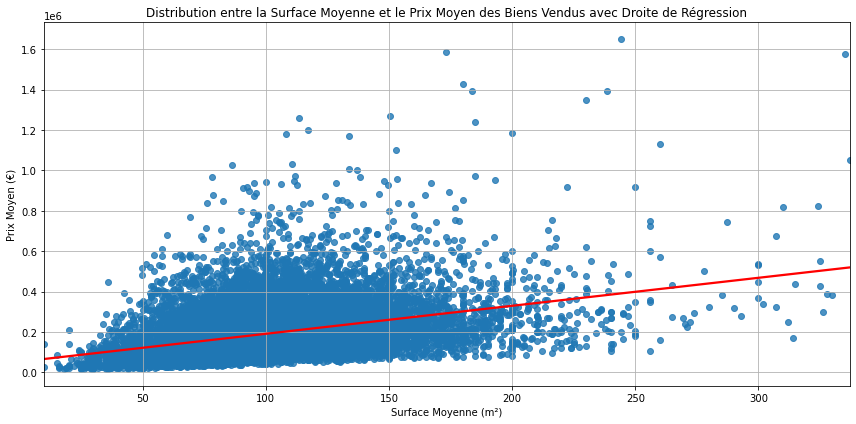

In [18]:
# Créer le nuage de points avec la droite de régression

plt.figure(figsize=(12, 6))
sns.regplot(x='SurfaceMoy', y='PrixMoyen', data=datadepartement, ci=None, line_kws={"color": "red"})
plt.title('Distribution entre la Surface Moyenne et le Prix Moyen des Biens Vendus avec Droite de Régression')
plt.xlabel('Surface Moyenne (m²)')
plt.ylabel('Prix Moyen (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# la correlation entre les deux variables


correlation = datadepartement['SurfaceMoy'].corr(datadepartement['PrixMoyen'])

print(f"La corrélation entre la surface moyenne et le prix moyen est de : {correlation:.2f}")


La corrélation entre la surface moyenne et le prix moyen est de : 0.36


#### Interprètation : Il y'a une correlation positive entre la surface moyenne et le prix moyen (0,36 > 0)

In [20]:
# Calculer les coefficients de la droite de régression
import scipy.stats as stats

# Calculer les coefficients de la droite de régression
slope, intercept, r_value, p_value, std_err = stats.linregress(datadepartement['SurfaceMoy'], datadepartement['PrixMoyen'])

# Calculer le coefficient de détermination (R²)
r_squared = r_value**2

print("Équation de la droite de régression :")
print(f"PrixMoyen = {intercept:.2f} + {slope:.2f} * SurfaceMoy")
print(f"Coefficient de corrélation (r) : {r_value:.2f}")
print(f"R² (coefficient de détermination) : {r_squared:.2f}")
print(f"p-value : {p_value:.2e}")
print(f"Erreur standard : {std_err:.2f}")


Équation de la droite de régression :
PrixMoyen = 52167.24 + 1386.20 * SurfaceMoy
Coefficient de corrélation (r) : 0.36
R² (coefficient de détermination) : 0.13
p-value : 0.00e+00
Erreur standard : 20.65


##### Interprètation :  le coefficient de détermination = 0,13; nous renseigne que la surface moyenne explique que 13% de la variation totale du prix moyen. On peut constater que le prix moyen depend aussi de d'autre variables.

# REGRESSION LINEAIRE MULTIPLE

In [21]:
# Sélectionner les caractéristiques et la variable cible
## Prix moyen du bien vendu (y) depend de ....
''
X = datadepartement[['Nb_mutations', 'Nb_vente_Maison','Nb_vente_Appart','prop_vente_maison','prop_vente_Appart','Prixm2Moyen','SurfaceMoy']]
y = datadepartement['PrixMoyen']
#datadepartement.columns =['Departement','Nb_mutations','Nb_vente_Maison','Nb_vente_Appart','prop_vente_maison','prop_vente_Appart','PrixMoyen','Prixm2Moyen','SurfaceMoy']

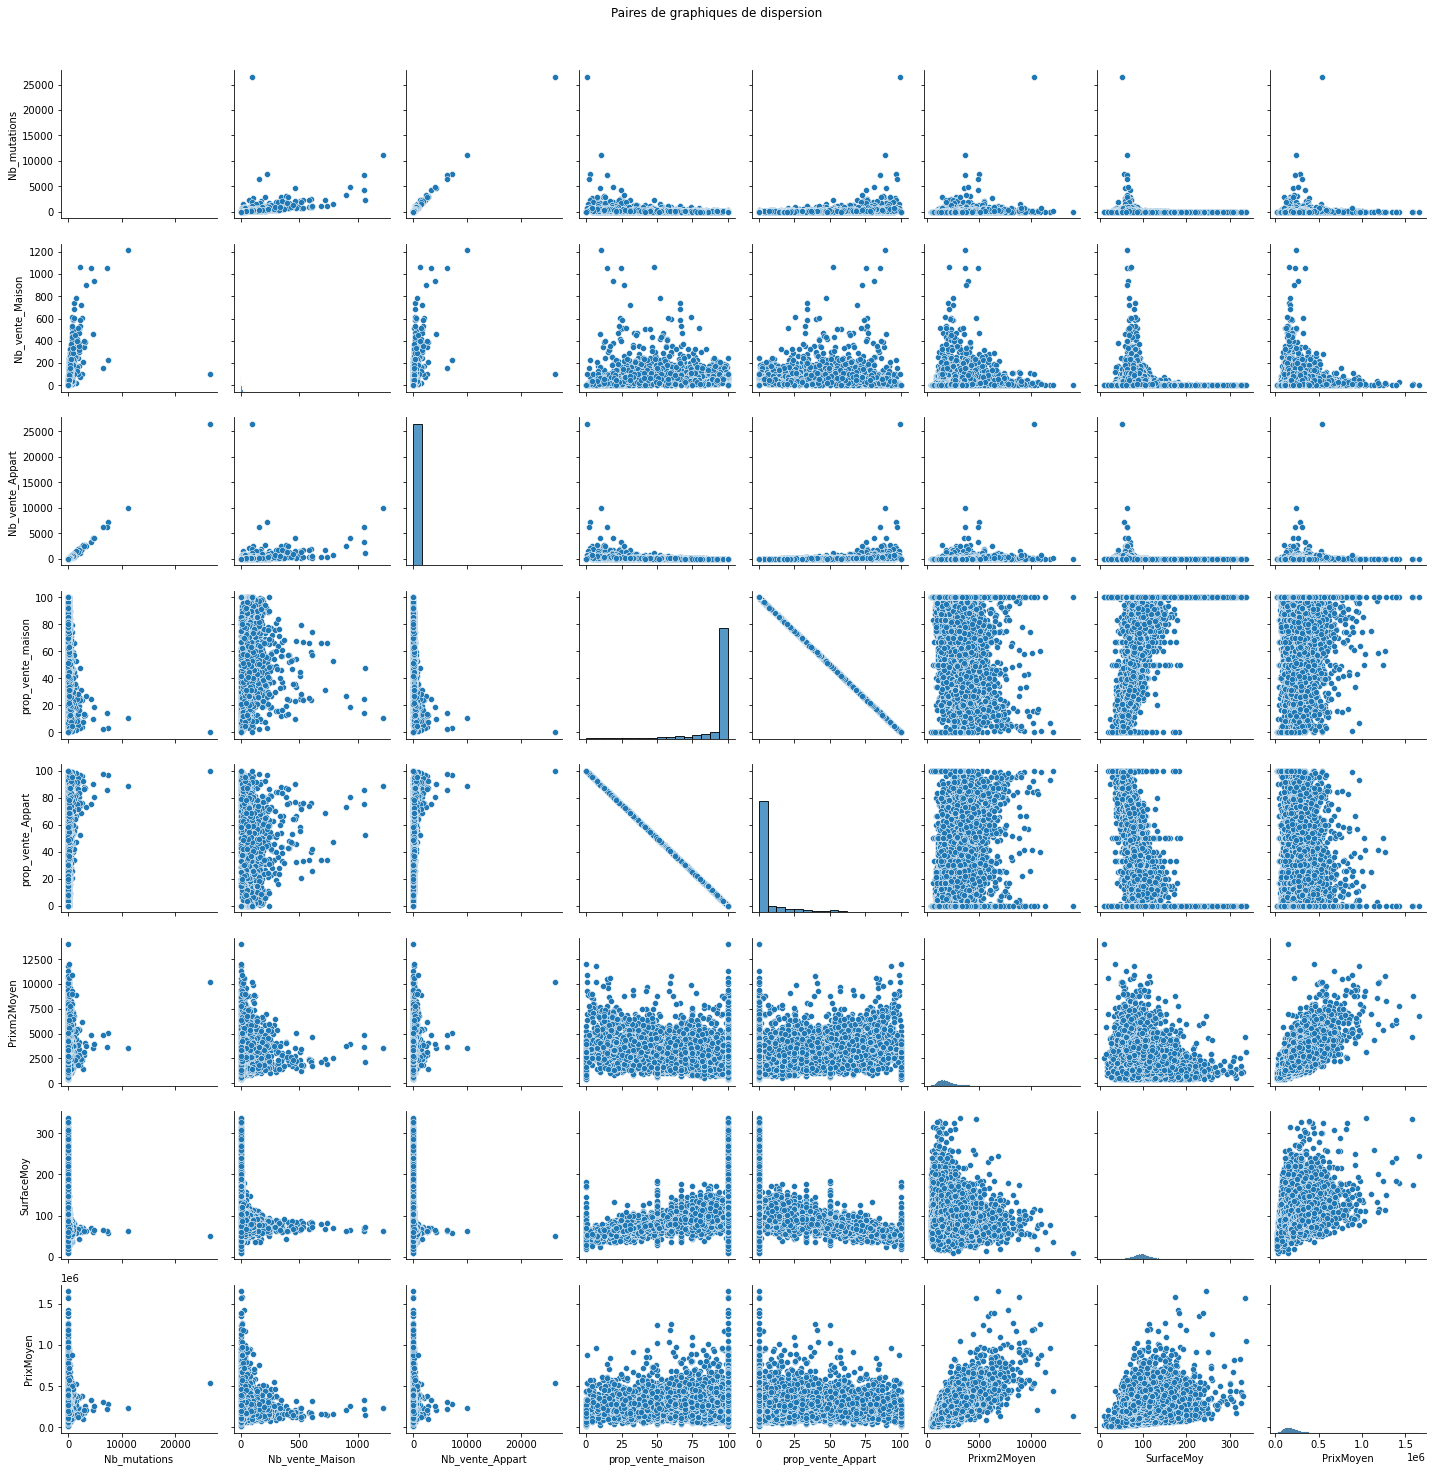

In [22]:
data = X.copy()
data['PrixMoyen'] = y

# Paires de graphiques de dispersion
sns.pairplot(data)
plt.suptitle('Paires de graphiques de dispersion', y=1.02)
plt.tight_layout()
plt.show()

                   Nb_mutations  Nb_vente_Maison  Nb_vente_Appart  \
Nb_mutations           1.000000         0.506600         0.988682   
Nb_vente_Maison        0.506600         1.000000         0.371519   
Nb_vente_Appart        0.988682         0.371519         1.000000   
prop_vente_maison     -0.262225        -0.363109        -0.219190   
prop_vente_Appart      0.262225         0.363109         0.219190   
PrixMoyen              0.062044         0.107399         0.048123   
Prixm2Moyen            0.156504         0.216938         0.130780   
SurfaceMoy            -0.087204        -0.144827        -0.068703   

                   prop_vente_maison  prop_vente_Appart  PrixMoyen  \
Nb_mutations               -0.262225           0.262225   0.062044   
Nb_vente_Maison            -0.363109           0.363109   0.107399   
Nb_vente_Appart            -0.219190           0.219190   0.048123   
prop_vente_maison           1.000000          -1.000000  -0.189982   
prop_vente_Appart          -

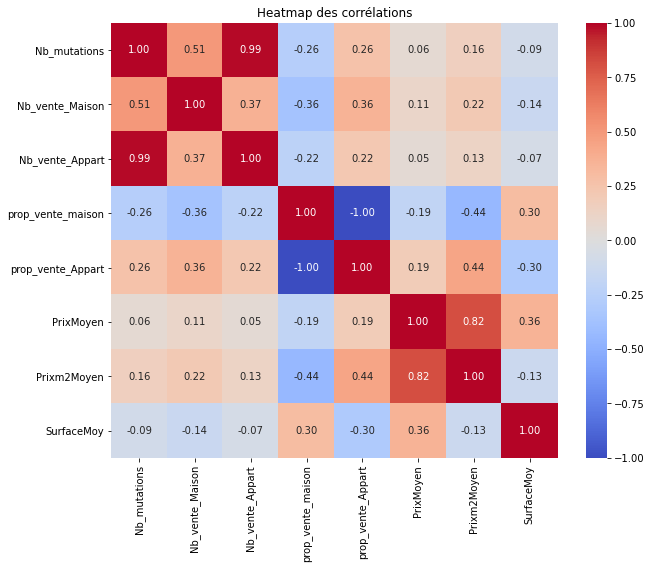

In [23]:
# Calculer la matrice de corrélation
corr_matrix = datadepartement.corr()

# Afficher la matrice de corrélation
print(corr_matrix)

# Créer une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()

                   Nb_mutations  Nb_vente_Maison  Nb_vente_Appart  \
Nb_mutations           1.000000         0.506600         0.988682   
Nb_vente_Maison        0.506600         1.000000         0.371519   
Nb_vente_Appart        0.988682         0.371519         1.000000   
prop_vente_maison           NaN              NaN              NaN   
prop_vente_Appart      0.262225         0.363109         0.219190   
PrixMoyen              0.062044         0.107399         0.048123   
Prixm2Moyen            0.156504         0.216938         0.130780   
SurfaceMoy                  NaN              NaN              NaN   

                   prop_vente_maison  prop_vente_Appart  PrixMoyen  \
Nb_mutations                     NaN           0.262225   0.062044   
Nb_vente_Maison                  NaN           0.363109   0.107399   
Nb_vente_Appart                  NaN           0.219190   0.048123   
prop_vente_maison           1.000000                NaN        NaN   
prop_vente_Appart           

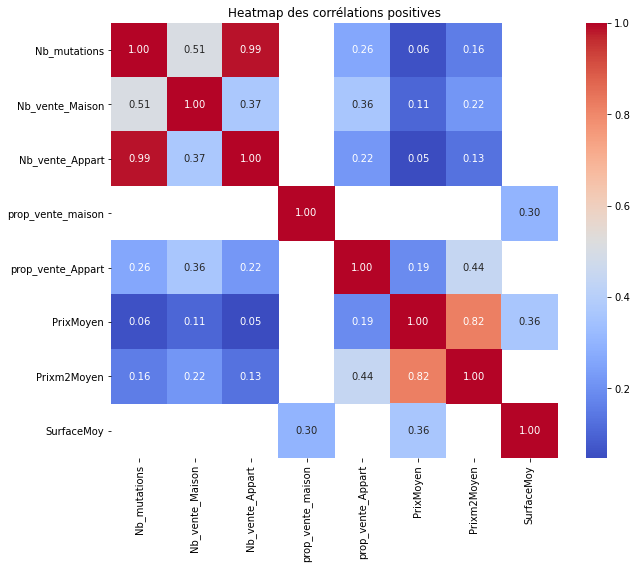

In [24]:
# Garder uniquement les corrélations positives
positive_corr_matrix = corr_matrix[corr_matrix > 0]

# Afficher la matrice de corrélation avec les corrélations positives
print(positive_corr_matrix)

# Créer une heatmap pour visualiser les corrélations positives
plt.figure(figsize=(10, 8))
sns.heatmap(positive_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations positives')
plt.show()

### LA DROITE DE REGRESSION

In [25]:
# Supprimez les colonnes non pertinentes pour la régression (par exemple, les identifiants, les colonnes textuelles)
X = datadepartement.drop(['PrixMoyen', 'Departement'], axis=1)
y = datadepartement['PrixMoyen']


In [26]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

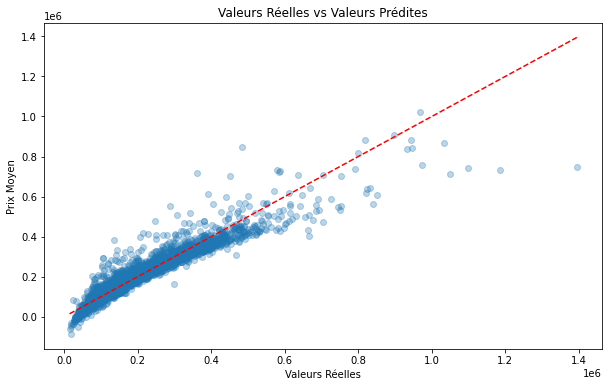

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prix Moyen')
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.show()

In [30]:
# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Coefficient de détermination (R²) : {r2:.2f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")

# Afficher les coefficients de la régression
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Coefficient de détermination (R²) : 0.90
Erreur quadratique moyenne (MSE) : 1094497395.73
                   Coefficient
Nb_mutations          9.774949
Nb_vente_Maison      34.132774
Nb_vente_Appart     -24.357826
prop_vente_maison   230.929503
prop_vente_Appart  -230.929503
Prixm2Moyen          92.668419
SurfaceMoy         1738.270137


#### Interprètation du resultat : le modèle explique que 90% des variable utiliser explique la variation du prix moyen des biens vendus

In [31]:
# Calculer les corrélations
correlations = datadepartement.corr()

# Sélectionner les variables avec une corrélation positive avec `PrixMoyen
variables_pos_corr = correlations['PrixMoyen'][correlations['PrixMoyen'] > 0].index.tolist()
variables_pos_corr.remove('PrixMoyen')

In [32]:
# Préparer les données
X = datadepartement[variables_pos_corr]
y = datadepartement['PrixMoyen']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [1]:
# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Coefficient de détermination (R²) : {r2:.2f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")

# Afficher les coefficients de la régression
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

NameError: name 'r2_score' is not defined

##### Interprètation du resultat : le modèle explique que 90% des variable utiliser explique la variation du prix moyen des biens vendus

In [34]:
# Construire l'équation de la droite de régression
intercept = model.intercept_
equation = f"PrixMoyen = {intercept:.2f}"
for var in variables_pos_corr:
    coef = coefficients.loc[var, 'Coefficient']
    equation += f" + ({coef:.2f} * {var})"

print("Équation de la droite de régression :")
print(equation)

Équation de la droite de régression :
PrixMoyen = -163511.83 + (9.77 * Nb_mutations) + (34.13 * Nb_vente_Maison) + (-24.36 * Nb_vente_Appart) + (-461.86 * prop_vente_Appart) + (92.67 * Prixm2Moyen) + (1738.27 * SurfaceMoy)


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Définir le modèle
model = ols('PrixMoyen ~ C(Departement)', data=datadepartement).fit()

# Effectuer l'ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print(anova_table)

                      sum_sq       df           F  PR(>F)
C(Departement)  9.821956e+13     93.0  140.293241     0.0
Residual        2.252070e+14  29916.0         NaN     NaN


###### Interpretation : PR(>F) = 0.0 < 0,05 : on estime qu'il y a une différence significative entre les prix moyens des biens vendus et les départements.

## PREDICTION SELON LE DEPARTEMENT HAUTE SAVOIE

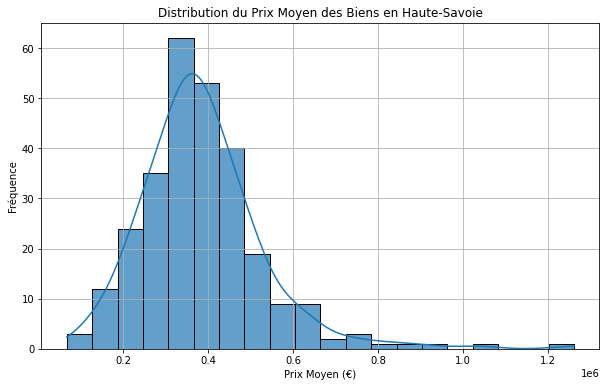

In [36]:
#DISTRIBUTION DU PRIX MOYEN SELON LE DEPARTEMENT HAUTE SAVOIE

plt.figure(figsize=(10, 6))
sns.histplot(haute_savoie_data['PrixMoyen'], bins=20, edgecolor='k', alpha=0.7, kde=True)
plt.title('Distribution du Prix Moyen des Biens en Haute-Savoie')
plt.xlabel('Prix Moyen (€)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [37]:
haute_savoie_data.head()

,Departement,Nb_mutations,Nb_vente_Maison,Nb_vente_Appart,prop_vente_maison,prop_vente_Appart,PrixMoyen,Prixm2Moyen,SurfaceMoy
24578,Haute-Savoie,43,12.0,31.0,27.906977,72.093023,184182.953488,3778.069767,45.023256
24579,Haute-Savoie,29,18.0,11.0,62.068966,37.931034,390751.206897,4173.206897,96.275862
24580,Haute-Savoie,7,6.0,1.0,85.714286,14.285714,853207.142857,6490.714286,129.285714
24581,Haute-Savoie,1,1.0,0.0,100.000000,0.000000,100000.000000,1724.000000,58.000000
24582,Haute-Savoie,44,33.0,11.0,75.000000,25.000000,397599.022727,4059.977273,101.090909


In [46]:
haute_savoie_data.count

,Nb_mutations,Nb_vente_Maison,Nb_vente_Appart,prop_vente_maison,prop_vente_Appart,PrixMoyen,Prixm2Moyen,SurfaceMoy
count,276.000000,276.000000,276.000000,276.000000,276.000000,2.760000e+02,276.000000,276.000000
mean,42.489130,12.510870,29.978261,60.435077,39.564923,3.848572e+05,4455.867432,89.509217
std,114.444095,13.582739,104.328883,29.655933,29.655933,1.457387e+05,1343.707760,24.941513
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+04,1048.000000,35.170213
25%,6.000000,4.000000,1.000000,35.701550,14.285714,2.964411e+05,3704.520833,74.921875
50%,14.000000,8.000000,5.000000,62.500000,37.500000,3.682842e+05,4251.544444,88.107143
75%,40.000000,16.250000,23.250000,85.714286,64.298450,4.472909e+05,4972.352174,102.193421
max,1600.000000,132.000000,1468.000000,100.000000,100.000000,1.261175e+06,10840.000000,250.000000


                   Nb_mutations  Nb_vente_Maison  Nb_vente_Appart  \
Nb_mutations           1.000000         0.771142         0.996559   
Nb_vente_Maison        0.771142         1.000000         0.715717   
Nb_vente_Appart        0.996559         0.715717         1.000000   
prop_vente_maison     -0.389380        -0.337574        -0.383183   
prop_vente_Appart      0.389380         0.337574         0.383183   
PrixMoyen             -0.090131        -0.044007        -0.093140   
Prixm2Moyen            0.113614         0.122108         0.108732   
SurfaceMoy            -0.250699        -0.218369        -0.246576   

                   prop_vente_maison  prop_vente_Appart  PrixMoyen  \
Nb_mutations               -0.389380           0.389380  -0.090131   
Nb_vente_Maison            -0.337574           0.337574  -0.044007   
Nb_vente_Appart            -0.383183           0.383183  -0.093140   
prop_vente_maison           1.000000          -1.000000   0.228262   
prop_vente_Appart          -

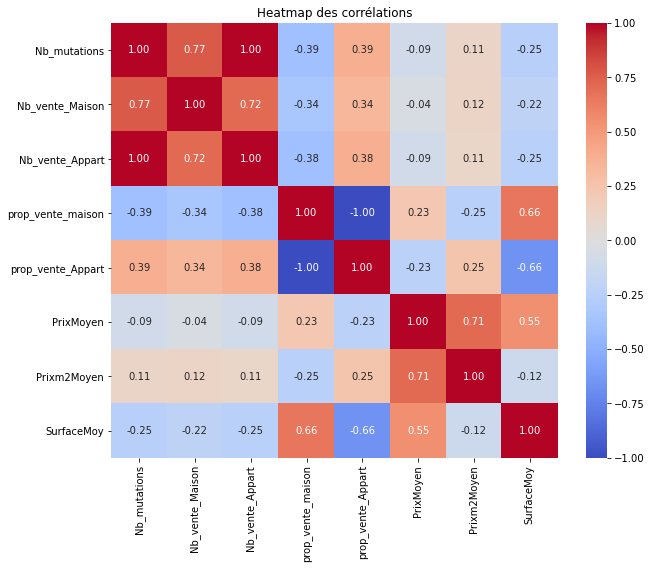

In [47]:
# Calculer les corrélations
correlationsHS = haute_savoie_data.corr()

# Afficher la matrice de corrélation
print(correlationsHS)

# Créer une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlationsHS, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()

In [48]:
# Sélectionner les variables avec une corrélation positive avec `PrixMoyen
variables_pos_corr = correlationsHS['PrixMoyen'][correlationsHS['PrixMoyen'] > 0].index.tolist()
variables_pos_corr.remove('PrixMoyen')

                   Nb_mutations  Nb_vente_Maison  Nb_vente_Appart  \
Nb_mutations           1.000000         0.771142         0.996559   
Nb_vente_Maison        0.771142         1.000000         0.715717   
Nb_vente_Appart        0.996559         0.715717         1.000000   
prop_vente_maison           NaN              NaN              NaN   
prop_vente_Appart      0.389380         0.337574         0.383183   
PrixMoyen                   NaN              NaN              NaN   
Prixm2Moyen            0.113614         0.122108         0.108732   
SurfaceMoy                  NaN              NaN              NaN   

                   prop_vente_maison  prop_vente_Appart  PrixMoyen  \
Nb_mutations                     NaN           0.389380        NaN   
Nb_vente_Maison                  NaN           0.337574        NaN   
Nb_vente_Appart                  NaN           0.383183        NaN   
prop_vente_maison           1.000000                NaN   0.228262   
prop_vente_Appart           

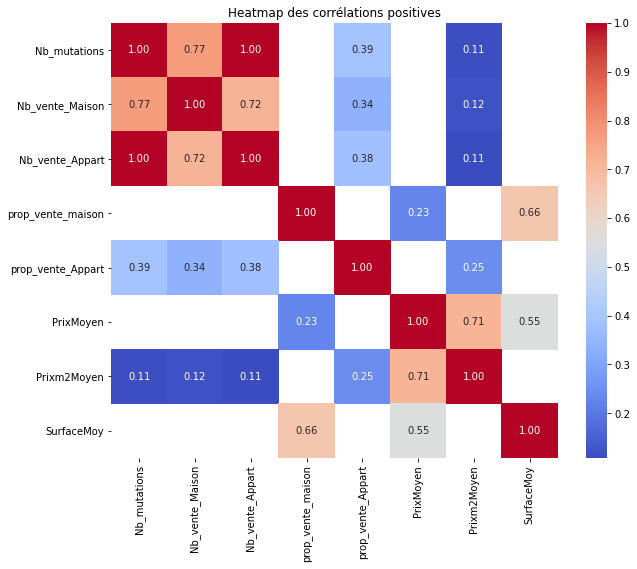

In [40]:
# Garder uniquement les corrélations positives
correlationsHS_pos = correlationsHS[correlationsHS > 0]

# Afficher la matrice de corrélation avec les corrélations positives
print(correlationsHS_pos)

# Créer une heatmap pour visualiser les corrélations positives
plt.figure(figsize=(10, 8))
sns.heatmap(correlationsHS_pos, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations positives')
plt.show()

In [54]:
# Supprimez les colonnes non pertinentes pour la régression (par exemple, les identifiants, les colonnes textuelles)
X = haute_savoie_data.drop(['PrixMoyen', 'Departement'], axis=1)
y = haute_savoie_data['PrixMoyen']


In [55]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

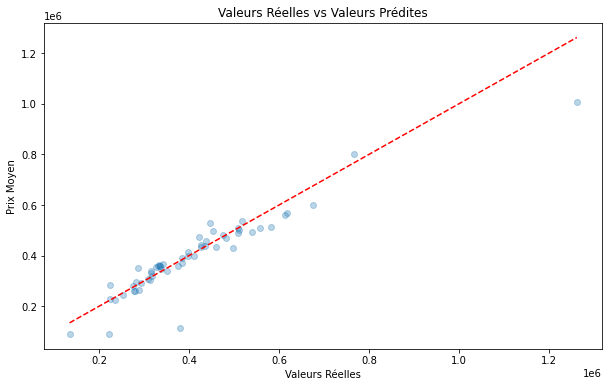

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prix Moyen')
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.show()

In [59]:
# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Coefficient de détermination (R²) : {r2:.2f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")

# Afficher les coefficients de la régression
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Coefficient de détermination (R²) : 0.87
Erreur quadratique moyenne (MSE) : 3734156633.00
                   Coefficient
Nb_mutations        150.089712
Nb_vente_Maison     555.816333
Nb_vente_Appart    -405.726621
prop_vente_maison   -58.823141
prop_vente_Appart    58.823141
Prixm2Moyen          83.067328
SurfaceMoy         3657.235203


##### Interprètation du resultat : le modèle explique que 87% des variable utiliser explique la variation du prix moyen des biens vendus

In [65]:
# Construire l'équation de la droite de régression
intercept = model.intercept_
equation = f"PrixMoyen = {intercept:.2f}"
for var in variables_pos_corr:
    coef = coefficients.loc[var, 'Coefficient']
    equation += f" + ({coef:.2f} * {var})"

print("Équation de la droite de régression :")
print(equation)

Équation de la droite de régression :
PrixMoyen = -314930.21 + (-58.82 * prop_vente_maison) + (83.07 * Prixm2Moyen) + (3657.24 * SurfaceMoy)
